In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import os
os.getcwd()
os.chdir("C:/Users/adria/Documents/University/SoSe23/Business_Forecasting_Frauke/Data/Data/Endogenous_variables")
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns

In [3]:
persincome_df = pd.read_excel('realpersincome.xlsx', parse_dates=['DATE'], index_col='DATE')
sales_df = pd.read_excel('real_retail_sales.xlsx', parse_dates=['DATE'], index_col='DATE')

<Axes: title={'center': 'Sales'}, xlabel='DATE'>

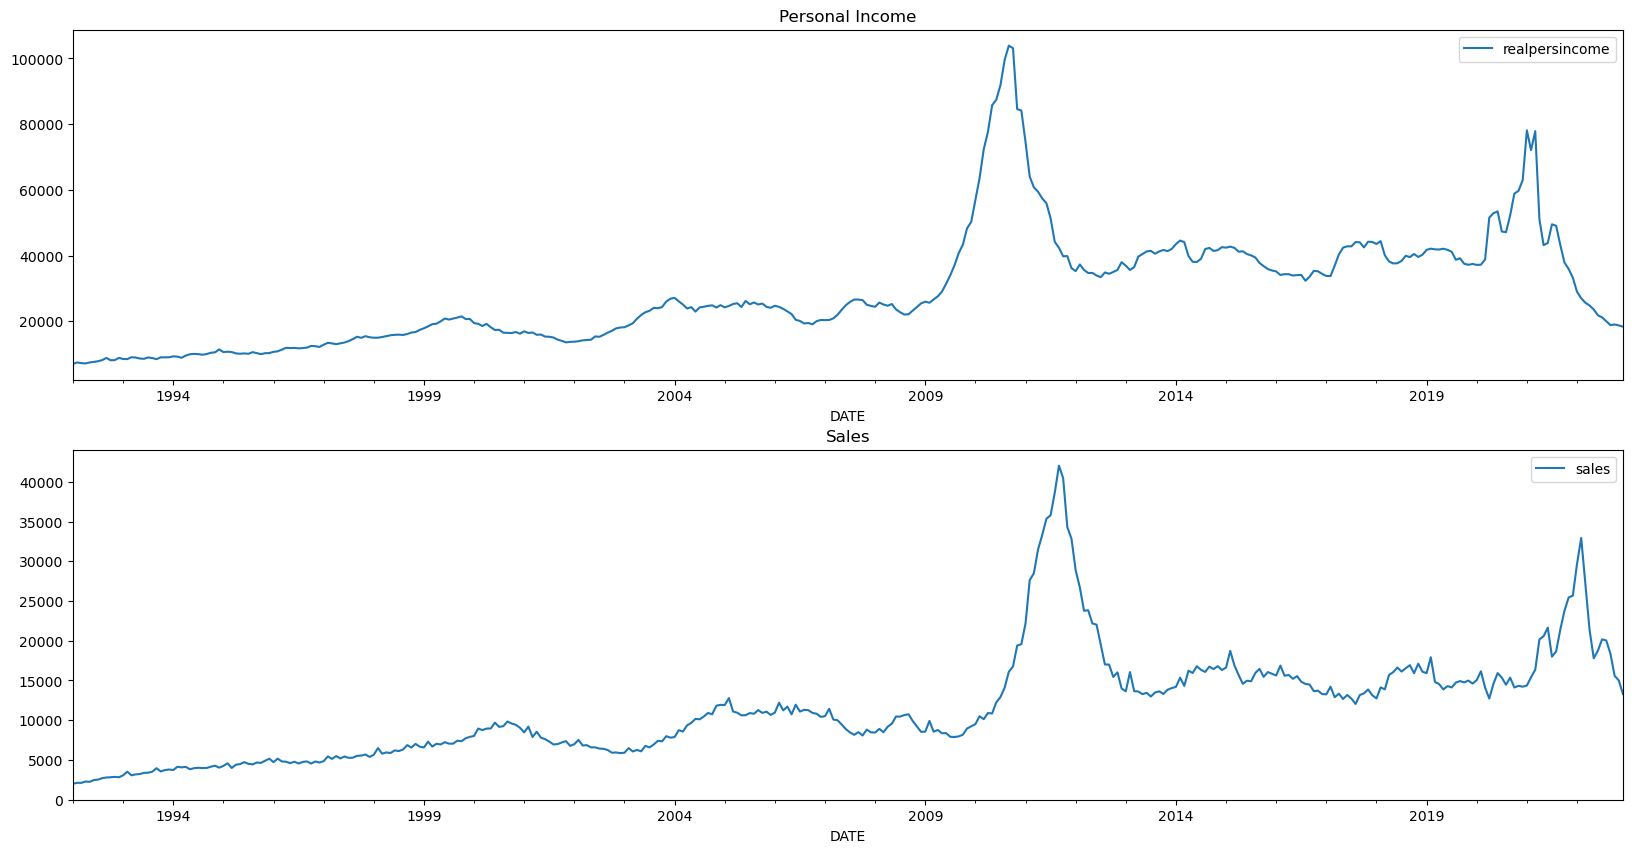

In [4]:
fig, ax = plt.subplots(nrows = 2, figsize = (20, 10))
persincome_df.plot(ax = ax[0], title = 'Personal Income')
sales_df.plot(ax = ax[1], title = 'Sales')

In [5]:
dlog_persincome_df = persincome_df['realpersincome'].apply(lambda x: np.log(x))
dlog_persincome_df = dlog_persincome_df.diff(1).dropna()
dlog_sales_df = sales_df['sales'].apply(lambda x: np.log(x))
dlog_sales_df = dlog_sales_df.diff(1).dropna()

In [6]:
data_df = pd.concat([dlog_sales_df, dlog_persincome_df], axis = 1)

In [7]:
data_df.isna().sum()

sales             0
realpersincome    0
dtype: int64

In [8]:
ad_fuller_results_1 = adfuller(dlog_sales_df)
ad_fuller_results_1

(-5.12583527400284,
 1.2435510690530812e-05,
 17,
 353,
 {'1%': -3.4490114443793214,
  '5%': -2.8697627072503757,
  '10%': -2.5711506161673716},
 -996.0663270812702)

In [11]:
model = VAR(data_df)
lag_order = model.select_order(maxlags=10)

C:\Users\adria\miniconda3\envs\tensorflow-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
print(lag_order)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 2, FPE -> 10, HQIC ->  5>


In [16]:
optimal_lag = lag_order.bic
model_fitted = model.fit(optimal_lag)

In [19]:
inst_causality_test = model_fitted.test_inst_causality(causing='realpersincome')
print(inst_causality_test.summary())

Instantaneous causality Wald-test. H_0: realpersincome does not instantaneously cause sales. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         36.79          3.841   0.000  1
----------------------------------------
